In [73]:
from matplotlib import pylab as plt

import lsst.daf.persistence as dp
import lsst.afw.display as display
import lsst.afw.display.rgb as rgb
import lsst.geom as geom
from astropy.io import fits
import numpy as np
import os, glob
from astropy.table import Table
from astropy.io import fits

In [74]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/DC2_v0_yband/masks/output/MASK/"

raw = fits.open(inpath + "3830_mask_binary.fits")
buff = fits.open(inpath + "3830_mask_binary_buffer.fits")

In [75]:
raw.info()

Filename: /sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/DC2_v0_yband/masks/output/MASK/3830_mask_binary.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   (374, 378)   float32   


In [76]:
raw[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  374 / length of data axis 1                          
NAXIS2  =                  378 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WCSAXES =                    2 / number of World Coordinate System axes         
RADESYS = 'FK5     '           / TSTRING                                        
EQUINOX =                2000. / TDOUBLE                                        
CUNIT1  = 'deg     '           / TSTRING                                        
CTYPE1  = 'RA---ZEA'        

In [77]:
def get_mask(fitsfile):
    ra_min, ra_max, step1 = fitsfile[0].header["START_1"], fitsfile[0].header["END_1"], fitsfile[0].header["STEP_1"]
    n_bin1 = int((ra_max-ra_min)/step1)
    dec_min, dec_max, step2 = fitsfile[0].header["START_2"], fitsfile[0].header["END_2"], fitsfile[0].header["STEP_2"]
    n_bin2 = int((dec_max-dec_min)/step2)
    extent = [ra_min, ra_max, dec_max, dec_min]
    data = fitsfile[0].data
    return data, extent

In [78]:
mask_raw, extent_raw = get_mask(raw)

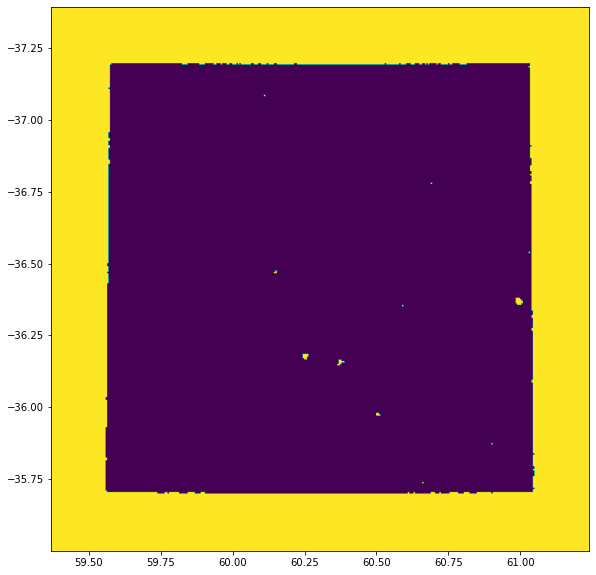

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(mask_raw, extent = extent_raw)

In [80]:
mask1, extent1 = get_mask(buff)

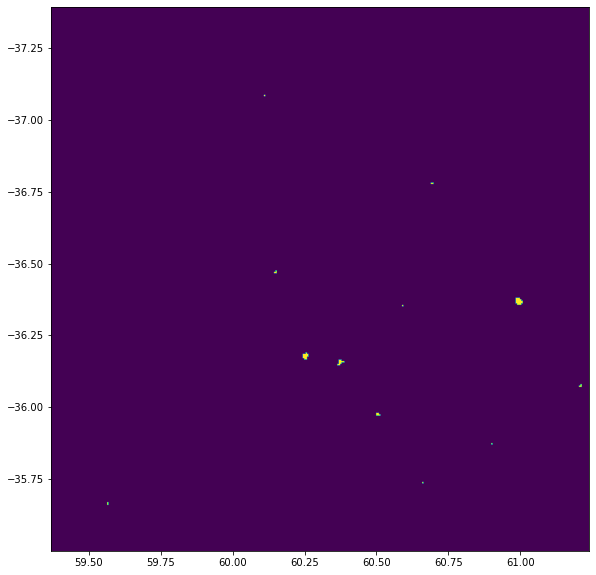

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(mask1, extent = extent1)

In [82]:
buff2 = fits.open(inpath + "3829_mask_binary_buffer.fits")
mask2, extent2 = get_mask(buff2)

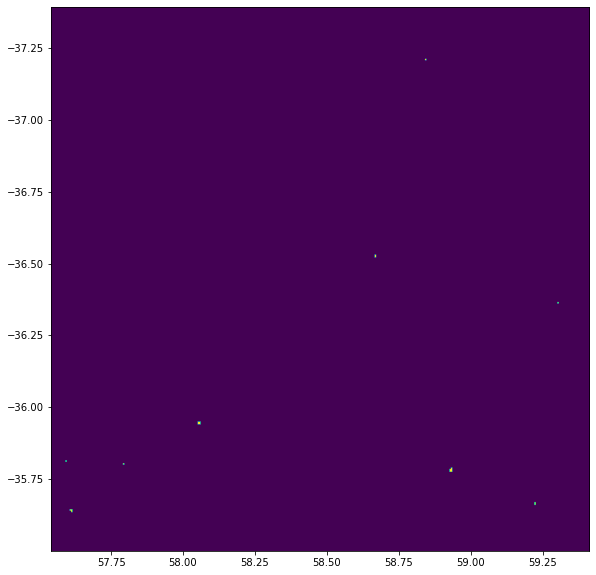

In [83]:
plt.figure(figsize=(10,10))
plt.imshow(mask1, extent = extent1)
plt.imshow(mask2, extent = extent2, cmap = 'viridis')

In [84]:
mask1[mask1!=0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [85]:
mask1!=0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])